In [1]:
# List files in the working directory to locate the 'fc' dataset files
import os
from pathlib import Path

root = Path('.')
# Show top-level contents
entries = sorted([(p.name, 'dir' if p.is_dir() else 'file') for p in root.iterdir()])
print('Top-level entries (name, type):')
for name, typ in entries:
    print(f"- {name} ({typ})")

# Heuristically search for directories/files containing 'fc' in the name
candidates = []
for p in root.rglob('*'):
    if 'fc' in p.name.lower() and (p.is_dir() or p.suffix.lower() in {'.csv', '.parquet', '.xlsx', '.xls'}):
        candidates.append(p)

print('\nCandidates containing "fc" (first 50):')
for p in sorted(candidates)[:50]:
    print('-', p.as_posix())
print(f"\nTotal fc candidates found: {len(candidates)}")


Top-level entries (name, type):
- .ipynb_checkpoints (dir)
- combine_fc_dataset_with_nation_column_20260221_165701.ipynb (file)
- combined_players_stats.csv (file)
- fc_dataset.ipynb (file)
- fcdataset (dir)
- final_rankings_weighted_score_norm2.csv (file)
- final_rankings_weighted_score_robust_z.csv (file)
- fourfourtwo-com-2026-02-21.csv (file)
- nation_matchup_probabilities_proxy_logreg.csv (file)
- nation_matchup_probabilities_proxy_logreg_ALL_pairs.csv (file)
- nation_matchup_probabilities_proxy_logreg_ALL_pairs_calibrated.csv (file)
- nation_player_based_strength_weighted_50_25_25.csv (file)
- nation_rankings_best_player_score_and_rank.csv (file)
- nation_rankings_from_weighted_score_norm2.csv (file)
- nation_rankings_sorted_by_best_player_score.csv (file)
- nation_rankings_squad_depth_12_23_avg.csv (file)
- nation_rankings_star_player_impact_top3_avg.csv (file)
- nation_rankings_starting_xi_top11.csv (file)
- player_performance_rankings_20260220_211248.ipynb (file)
- team_rankin

In [2]:
# Inspect the fcdataset directory contents to understand file types and naming
from pathlib import Path

fc_dir = Path('fcdataset')
assert fc_dir.exists() and fc_dir.is_dir(), f"Expected directory not found: {fc_dir.resolve()}"

files = sorted([p for p in fc_dir.rglob('*') if p.is_file()])
print(f"Total files under {fc_dir}: {len(files)}")
print("First 60 files:")
for p in files[:60]:
    print('-', p.as_posix())

# Summarize by extension
from collections import Counter
ext_counts = Counter([p.suffix.lower() for p in files])
print("\nFile extensions:")
for ext, cnt in ext_counts.most_common():
    print(f"{ext or '[no suffix]'}: {cnt}")


Total files under fcdataset: 42
First 60 files:
- fcdataset/sofifa-com-algeria.csv
- fcdataset/sofifa-com-argentina.csv
- fcdataset/sofifa-com-australia.csv
- fcdataset/sofifa-com-austria.csv
- fcdataset/sofifa-com-belgium.csv
- fcdataset/sofifa-com-brazil.csv
- fcdataset/sofifa-com-canada.csv
- fcdataset/sofifa-com-cape verde.csv
- fcdataset/sofifa-com-colombia.csv
- fcdataset/sofifa-com-croatia.csv
- fcdataset/sofifa-com-curacao.csv
- fcdataset/sofifa-com-ecuador.csv
- fcdataset/sofifa-com-egypt.csv
- fcdataset/sofifa-com-england.csv
- fcdataset/sofifa-com-france.csv
- fcdataset/sofifa-com-germany.csv
- fcdataset/sofifa-com-ghana.csv
- fcdataset/sofifa-com-haiti.csv
- fcdataset/sofifa-com-iran.csv
- fcdataset/sofifa-com-ivory coast.csv
- fcdataset/sofifa-com-japan.csv
- fcdataset/sofifa-com-jordan.csv
- fcdataset/sofifa-com-mexico.csv
- fcdataset/sofifa-com-morocco.csv
- fcdataset/sofifa-com-netherlands.csv
- fcdataset/sofifa-com-new zealand.csv
- fcdataset/sofifa-com-norway.csv
- fc

In [3]:
# Inspect a few CSVs to understand schema and whether a 'nation' column already exists
import pandas as pd
from pathlib import Path

fc_dir = Path('fcdataset')
files = sorted([p for p in fc_dir.glob('*.csv')])

sample_files = files[:3] + files[-2:]
info = []
for fp in sample_files:
    df = pd.read_csv(fp)
    info.append((fp.name, df.shape, list(df.columns)[:25]))
    print(f"\n{fp.name}: shape={df.shape}")
    print("Columns (first 25):", list(df.columns)[:25])
    display(df.head(3))

print(f"\nTotal CSV files detected: {len(files)}")



sofifa-com-algeria.csv: shape=(23, 52)
Columns (first 25): ['web_scraper_order', 'web_scraper_start_url', 'name', 'team_contract', 'best_position', 'club_position', 'team_contract2', 'birth_year', 'acceleration_type', 'total_stats', 'data', 'height', 'weight', 'joined', 'value', 'wage', 'release_clause', 'body_type', 'total_attacking', 'total_skill', 'total_movement', 'total_power', 'total_mentality', 'total_defending', 'total_goalkeeping']


web_scraper_order                              web_scraper_start_url  \
0      1771703638-1  https://sofifa.com/squad/2417285?&showCol%5B%5...   
1      1771703638-2  https://sofifa.com/squad/2417285?&showCol%5B%5...   
2      1771703638-3  https://sofifa.com/squad/2417285?&showCol%5B%5...   

          name     team_contract best_position club_position team_contract2  \
0    L. Zidane        Granada CF            GK            GK    2024 ~ 2027   
1  R. Belghali  Hellas Verona FC            RM            RB    2025 ~ 2029   
2     A. Mandi         Lille OSC            CB           RCB    2024 ~ 2026   

   birth_year   acceleration_type  total_stats  ...  short_passing volleys  \
0        1998          Controlled         1064  ...             40       6   
1        2002          Controlled         1907  ...             69      60   
2        1991  Controlled lengthy         1897  ...             76      49   

  dribbling curve fk_accuracy long_passing ball_control acceleration  \
0        12    14          11           20           22           29   
1        72    62          56           64           70           79   
2        64    67          49           75           71           59   

   sprint_speed                                              image  
0            50  https://cdn.sofifa.net/players/240/311/26_180.png  
1            83  https://cdn.sofifa.net/players/276/314/26_180.png  
2            55  https://cdn.sofifa.net/players/201/143/26_180.png  

[3 rows x 52 columns]


sofifa-com-argentina.csv: shape=(26, 52)
Columns (first 25): ['web_scraper_order', 'web_scraper_start_url', 'name', 'team_contract', 'best_position', 'club_position', 'team_contract2', 'birth_year', 'acceleration_type', 'total_stats', 'data', 'height', 'weight', 'joined', 'value', 'wage', 'release_clause', 'body_type', 'total_attacking', 'total_skill', 'total_movement', 'total_power', 'total_mentality', 'total_defending', 'total_goalkeeping']


web_scraper_order             web_scraper_start_url         name  \
0      1771703883-1  https://sofifa.com/squad/2417291  E. Martínez   
1      1771703883-2  https://sofifa.com/squad/2417291    N. Molina   
2      1771703883-3  https://sofifa.com/squad/2417291    C. Romero   

       team_contract best_position club_position team_contract2  birth_year  \
0        Aston Villa            GK            GK    2020 ~ 2029        1992   
1    Atlético Madrid            RB           SUB    2022 ~ 2027        1998   
2  Tottenham Hotspur            CB           RCB    2022 ~ 2029        1998   

      acceleration_type  total_stats  ...  heading_accuracy short_passing  \
0    Controlled lengthy         1539  ...                26            61   
1  Controlled explosive         2027  ...                59            76   
2    Controlled lengthy         1888  ...                85            76   

  volleys dribbling curve fk_accuracy long_passing ball_control  acceleration  \
0      13        24    22          20           59           43            55   
1      62        72    68          44           67           75            78   
2      52        60    54          38           70           67            63   

                                               image  
0  https://cdn.sofifa.net/players/202/811/26_180.png  
1  https://cdn.sofifa.net/players/233/084/26_180.png  
2  https://cdn.sofifa.net/players/232/488/26_180.png  

[3 rows x 52 columns]


sofifa-com-australia.csv: shape=(26, 52)
Columns (first 25): ['web_scraper_order', 'web_scraper_start_url', 'name', 'team_contract', 'best_position', 'club_position', 'team_contract2', 'birth_year', 'acceleration_type', 'total_stats', 'data', 'height', 'weight', 'joined', 'value', 'wage', 'release_clause', 'body_type', 'total_attacking', 'total_skill', 'total_movement', 'total_power', 'total_mentality', 'total_defending', 'total_goalkeeping']


web_scraper_order             web_scraper_start_url        name  \
0      1771706920-1  https://sofifa.com/squad/2415792     M. Ryan   
1      1771706920-2  https://sofifa.com/squad/2415792  H. Souttar   
2      1771706920-3  https://sofifa.com/squad/2415792  C. Burgess   

    team_contract best_position club_position team_contract2  birth_year  \
0      Levante UD            GK            GK    2025 ~ 2026        1992   
1  Leicester City            CB           RES    2023 ~ 2028        1998   
2    Swansea City            CB           LCB    2025 ~ 2028        1995   

    acceleration_type  total_stats  ...  volleys dribbling curve fk_accuracy  \
0          Controlled         1403  ...       17        18    28          15   
1  Controlled lengthy         1485  ...       23        52    26          31   
2  Controlled lengthy         1635  ...       23        45    37          30   

  long_passing ball_control acceleration sprint_speed  agility  \
0           48           32           52           52       55   
1           66           62           40           51       36   
2           67           67           43           52       45   

                                               image  
0  https://cdn.sofifa.net/players/199/005/26_180.png  
1  https://cdn.sofifa.net/players/229/901/26_180.png  
2  https://cdn.sofifa.net/players/216/744/26_180.png  

[3 rows x 52 columns]


sofifa-com-uruguay.csv: shape=(26, 52)
Columns (first 25): ['web_scraper_order', 'web_scraper_start_url', 'name', 'team_contract', 'best_position', 'club_position', 'team_contract2', 'birth_year', 'acceleration_type', 'total_stats', 'data', 'height', 'weight', 'joined', 'value', 'wage', 'release_clause', 'body_type', 'total_attacking', 'total_skill', 'total_movement', 'total_power', 'total_mentality', 'total_defending', 'total_goalkeeping']


web_scraper_order             web_scraper_start_url        name  \
0      1771706174-1  https://sofifa.com/squad/2395390  F. Muslera   
1      1771706174-2  https://sofifa.com/squad/2395390  S. Mouriño   
2      1771706174-3  https://sofifa.com/squad/2395390   R. Araujo   

             team_contract best_position club_position team_contract2  \
0  Estudiantes de La Plata            GK            GK    2025 ~ 2026   
1            Villarreal CF            CB            RB    2025 ~ 2030   
2             FC Barcelona            CB           SUB    2018 ~ 2031   

   birth_year   acceleration_type  total_stats  ...  volleys dribbling curve  \
0        1986  Controlled lengthy         1324  ...       10        25    14   
1        2002  Controlled lengthy         1853  ...       31        70    52   
2        1999  Controlled lengthy         1897  ...       40        53    47   

  fk_accuracy long_passing ball_control acceleration sprint_speed  agility  \
0          10           40           27           40           47       45   
1          31           67           73           78           82       66   
2          45           66           66           73           84       54   

                                               image  
0  https://cdn.sofifa.net/players/182/494/26_180.png  
1  https://cdn.sofifa.net/players/276/493/26_180.png  
2  https://cdn.sofifa.net/players/253/163/26_180.png  

[3 rows x 52 columns]


sofifa-com-uzbekistan.csv: shape=(23, 52)
Columns (first 25): ['web_scraper_order', 'web_scraper_start_url', 'name', 'name2', 'best_position', 'club_position', 'birth_year', 'total_stats', 'phone', 'height', 'weight', 'joined', 'value', 'wage', 'total_attacking', 'total_skill', 'total_movement', 'total_power', 'total_mentality', 'total_defending', 'total_goalkeeping', 'base_stats', 'team_contract', 'name3', 'team_contract2']


web_scraper_order             web_scraper_start_url             name name2  \
0      1771706270-1  https://sofifa.com/squad/2104480    25 U. Yusupov    GK   
1      1771706270-2  https://sofifa.com/squad/2104480  25 K. Alizhonov    RB   
2      1771706270-3  https://sofifa.com/squad/2104480   25 A. Khusanov    CB   

  best_position club_position  birth_year  total_stats     phone       height  \
0            GK           RES        1990         1170  15015821   185cm 6'1"   
1           NaN           RES        1996         2011  15015844  180cm 5'11"   
2           NaN           NaN        2003         1783  15015792   186cm 6'1"   

   ... agility reactions balance shot_power  jumping  stamina  strength  \
0  ...      45        64      32         21       72       45        59   
1  ...      74        68      69         74       64       87        68   
2  ...      59        74      51         49       87       64        84   

   long_shots  aggression  interceptions  
0          13          35             20  
1          73          57             68  
2          36          80             78  

[3 rows x 52 columns]


Total CSV files detected: 42


In [4]:
# Combine all nation CSVs into one dataset and add a `nation` column derived from filename
import pandas as pd
from pathlib import Path

fc_dir = Path('fcdataset')
files = sorted(fc_dir.glob('*.csv'))

combined_parts = []
col_sets = {}

for fp in files:
    nation = fp.stem
    # expected like "sofifa-com-argentina" -> "argentina"
    if nation.lower().startswith('sofifa-com-'):
        nation = nation[len('sofifa-com-'):]

    df_part = pd.read_csv(fp)

    # Add nation column if not already present
    if 'nation' not in df_part.columns:
        df_part.insert(0, 'nation', nation)
    else:
        # If it exists but is empty/NaN, fill it
        df_part['nation'] = df_part['nation'].fillna(nation)

    col_sets[fp.name] = tuple(df_part.columns)
    combined_parts.append(df_part)

combined_df = pd.concat(combined_parts, ignore_index=True, sort=False)

# Basic validation / summary
print(f"Files combined: {len(files)}")
print(f"Combined shape: {combined_df.shape}")
print("\nRows per nation (top 20):")
print(combined_df['nation'].value_counts().head(20))

# Check for column inconsistencies across files
unique_col_orders = {cols for cols in col_sets.values()}
print(f"\nUnique column layouts across files: {len(unique_col_orders)}")
if len(unique_col_orders) > 1:
    # Show a small diff summary: which files differ from the most common column layout
    from collections import Counter
    most_common_cols, _ = Counter(col_sets.values()).most_common(1)[0]
    differing = [fn for fn, cols in col_sets.items() if cols != most_common_cols]
    print(f"Files with differing columns vs most common layout: {len(differing)}")
    print("First 10 differing files:", differing[:10])

# Write combined CSV
out_path = Path('combined_fc_dataset_with_nation.csv')
combined_df.to_csv(out_path, index=False)
print(f"\nWrote: {out_path.resolve()}")

# Show a few rows
display(combined_df.head(5))


Files combined: 42
Combined shape: (1038, 88)

Rows per nation (top 20):
nation
saudi arabia     31
panama           28
croatia          26
belgium          26
brazil           26
canada           26
england          26
ecuador          26
argentina        26
australia        26
united states    26
south korea      26
spain            26
switzerland      26
ghana            26
morocco          26
germany          26
france           26
new zealand      26
mexico           26
Name: count, dtype: int64

Unique column layouts across files: 32
Files with differing columns vs most common layout: 38
First 10 differing files: ['sofifa-com-algeria.csv', 'sofifa-com-argentina.csv', 'sofifa-com-austria.csv', 'sofifa-com-belgium.csv', 'sofifa-com-brazil.csv', 'sofifa-com-canada.csv', 'sofifa-com-cape verde.csv', 'sofifa-com-colombia.csv', 'sofifa-com-croatia.csv', 'sofifa-com-curacao.csv']

Wrote: /__modal/volumes/vo-WxhTllT4eWklIvn6w8GpYY/jupyterroot/combined_fc_dataset_with_nation.csv


nation web_scraper_order  \
0  algeria      1771703638-1   
1  algeria      1771703638-2   
2  algeria      1771703638-3   
3  algeria      1771703638-4   
4  algeria      1771703638-5   

                               web_scraper_start_url           name  \
0  https://sofifa.com/squad/2417285?&showCol%5B%5...      L. Zidane   
1  https://sofifa.com/squad/2417285?&showCol%5B%5...    R. Belghali   
2  https://sofifa.com/squad/2417285?&showCol%5B%5...       A. Mandi   
3  https://sofifa.com/squad/2417285?&showCol%5B%5...  R. Bensebaini   
4  https://sofifa.com/squad/2417285?&showCol%5B%5...   R. Aït-Nouri   

       team_contract best_position club_position team_contract2  birth_year  \
0         Granada CF            GK            GK    2024 ~ 2027        1998   
1   Hellas Verona FC            RM            RB    2025 ~ 2029        2002   
2          Lille OSC            CB           RCB    2024 ~ 2026        1991   
3  Borussia Dortmund            CB           SUB    2023 ~ 2027        1995   
4    Manchester City           LWB           SUB    2025 ~ 2030        2001   

    acceleration_type  ...  penalties  stamina strength long_shots aggression  \
0          Controlled  ...        NaN      NaN      NaN        NaN        NaN   
1          Controlled  ...        NaN      NaN      NaN        NaN        NaN   
2  Controlled lengthy  ...        NaN      NaN      NaN        NaN        NaN   
3  Controlled lengthy  ...        NaN      NaN      NaN        NaN        NaN   
4    Mostly explosive  ...        NaN      NaN      NaN        NaN        NaN   

  name7 name6 name8 interceptions  attack_position  
0   NaN   NaN   NaN           NaN              NaN  
1   NaN   NaN   NaN           NaN              NaN  
2   NaN   NaN   NaN           NaN              NaN  
3   NaN   NaN   NaN           NaN              NaN  
4   NaN   NaN   NaN           NaN              NaN  

[5 rows x 88 columns]

In [5]:
# Diagnose issues in combined_df: missingness, duplicated/odd columns, per-nation sparsity
import pandas as pd
import numpy as np

# Basic info
print('combined_df shape:', combined_df.shape)
print('Number of nations:', combined_df['nation'].nunique())

# Missingness overview
missing_frac = combined_df.isna().mean().sort_values(ascending=False)
print('\nTop 25 columns by missing fraction:')
print(missing_frac.head(25))

# Columns that are entirely missing (all NaN)
all_missing = missing_frac[missing_frac == 1.0].index.tolist()
print(f"\nColumns that are 100% missing: {len(all_missing)}")
print(all_missing[:50])

# Columns with very low coverage
low_coverage = missing_frac[(missing_frac > 0.95) & (missing_frac < 1.0)]
print(f"\nColumns with >95% missing but not all-missing: {len(low_coverage)}")
print(low_coverage.head(30))

# Check for duplicated column names (can happen with messy concatenations)
dup_cols = combined_df.columns[combined_df.columns.duplicated()].tolist()
print(f"\nDuplicated column names: {len(dup_cols)}")
if dup_cols:
    print(dup_cols)

# Per-nation row counts and a quick missingness for a few key numeric columns
key_cols = [c for c in ['overall', 'potential', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'total_stats'] if c in combined_df.columns]
print('\nKey cols present:', key_cols)

if key_cols:
    nation_missing = combined_df.groupby('nation')[key_cols].apply(lambda g: g.isna().mean()).mean(axis=1).sort_values(ascending=False)
    print('\nNations with highest average missingness across key cols (top 15):')
    print(nation_missing.head(15))

# Look at columns that look like scrape artifacts (name2/name6/etc)
artifact_cols = [c for c in combined_df.columns if c.lower().startswith('name') and c != 'name']
print(f"\nColumns starting with 'name' besides 'name': {len(artifact_cols)}")
print(artifact_cols)

# Show a small sample of rows where these artifact columns are populated
if artifact_cols:
    mask = combined_df[artifact_cols].notna().any(axis=1)
    sample = combined_df.loc[mask, ['nation', 'name'] + artifact_cols].head(10)
    print('\nSample rows where artifact name* columns are populated:')
    display(sample)


combined_df shape: (1038, 88)
Number of nations: 42

Top 25 columns by missing fraction:
defensive_work_rate         1.000000
attacking_work_rate         1.000000
penalties                   0.998073
team_contract4              0.997110
loan_date_end               0.994220
name7                       0.982659
dribbling2                  0.978805
ball_control2               0.978805
short_passing2              0.978805
sprint_speed2               0.978805
heading_accuracy2           0.974952
attack_position             0.974952
name8                       0.973025
name6                       0.965318
overall_rating2             0.958574
interceptions               0.952794
image2                      0.950867
playstyles_+                0.949904
playstyles5                 0.946050
long_shots                  0.932563
aggression                  0.932563
real_face                   0.921002
foot                        0.921002
international_reputation    0.921002
skill_moves            

nation           name name2 name3 name4 name5  name7 name6 name8
0  algeria      L. Zidane    GK   NaN   NaN   NaN    NaN   NaN   NaN
1  algeria    R. Belghali    RB    RM   NaN   NaN    NaN   NaN   NaN
2  algeria       A. Mandi    CB   NaN   NaN    CB    NaN   NaN   NaN
3  algeria  R. Bensebaini    CB   NaN   NaN    CB    NaN   NaN   NaN
4  algeria   R. Aït-Nouri    LB   NaN   NaN   NaN    NaN   NaN   NaN
5  algeria    N. Bentaleb   CDM   NaN   NaN   NaN    NaN   NaN   NaN
6  algeria     A. Zorgane   CDM   NaN   NaN   NaN    NaN   NaN   NaN
7  algeria      R. Mahrez    RM    RM   NaN   NaN    NaN   NaN   NaN
8  algeria      M. Amoura    ST   NaN   CAM   NaN    NaN   NaN   NaN
9  algeria     H. Abdelli   CAM   NaN   CAM   NaN    NaN   NaN   NaN

In [6]:
# Write the existing combined_df to the requested CSV filename
from pathlib import Path

out_path_fc26 = Path('fc26_combined.csv')
combined_df.to_csv(out_path_fc26, index=False)
print(f"Wrote {out_path_fc26.resolve()} with shape {combined_df.shape}")

Wrote /__modal/volumes/vo-WxhTllT4eWklIvn6w8GpYY/jupyterroot/fc26_combined.csv with shape (1038, 88)


In [7]:
# Load fc26_combined.csv, drop web_scraper_start_url and image columns, and overwrite the CSV
import pandas as pd
from pathlib import Path

in_path = Path('fc26_combined.csv')
df_fc26 = pd.read_csv(in_path)

cols_to_drop = [c for c in ['web_scraper_start_url', 'image', 'image2'] if c in df_fc26.columns]
print('Columns found to drop:', cols_to_drop)

df_fc26_clean = df_fc26.drop(columns=cols_to_drop)

out_path = Path('fc26_combined.csv')
df_fc26_clean.to_csv(out_path, index=False)

print(f"Wrote {out_path.resolve()} | shape: {df_fc26_clean.shape} (was {df_fc26.shape})")
print('Dropped columns:', cols_to_drop)

# Quick peek
display(df_fc26_clean.head(3))

Columns found to drop: ['web_scraper_start_url', 'image', 'image2']
Wrote /__modal/volumes/vo-WxhTllT4eWklIvn6w8GpYY/jupyterroot/fc26_combined.csv | shape: (1038, 85) (was (1038, 88))
Dropped columns: ['web_scraper_start_url', 'image', 'image2']


nation web_scraper_order         name     team_contract best_position  \
0  algeria      1771703638-1    L. Zidane        Granada CF            GK   
1  algeria      1771703638-2  R. Belghali  Hellas Verona FC            RM   
2  algeria      1771703638-3     A. Mandi         Lille OSC            CB   

  club_position team_contract2  birth_year   acceleration_type  total_stats  \
0            GK    2024 ~ 2027        1998          Controlled         1064   
1            RB    2025 ~ 2029        2002          Controlled         1907   
2           RCB    2024 ~ 2026        1991  Controlled lengthy         1897   

   ...  penalties stamina strength long_shots aggression name7 name6 name8  \
0  ...        NaN     NaN      NaN        NaN        NaN   NaN   NaN   NaN   
1  ...        NaN     NaN      NaN        NaN        NaN   NaN   NaN   NaN   
2  ...        NaN     NaN      NaN        NaN        NaN   NaN   NaN   NaN   

   interceptions  attack_position  
0            NaN              NaN  
1            NaN              NaN  
2            NaN              NaN  

[3 rows x 85 columns]

In [8]:
# Drop web_scraper_order from fc26_combined.csv (overwrite in place)
import pandas as pd
from pathlib import Path

path = Path('fc26_combined.csv')
df_tmp = pd.read_csv(path)

cols_to_drop = [c for c in ['web_scraper_order'] if c in df_tmp.columns]
print('Columns found to drop:', cols_to_drop)

df_tmp2 = df_tmp.drop(columns=cols_to_drop)

df_tmp2.to_csv(path, index=False)
print(f"Wrote {path.resolve()} | shape: {df_tmp2.shape} (was {df_tmp.shape})")

display(df_tmp2.head(3))

Columns found to drop: ['web_scraper_order']
Wrote /__modal/volumes/vo-WxhTllT4eWklIvn6w8GpYY/jupyterroot/fc26_combined.csv | shape: (1038, 84) (was (1038, 85))


nation         name     team_contract best_position club_position  \
0  algeria    L. Zidane        Granada CF            GK            GK   
1  algeria  R. Belghali  Hellas Verona FC            RM            RB   
2  algeria     A. Mandi         Lille OSC            CB           RCB   

  team_contract2  birth_year   acceleration_type  total_stats      data  ...  \
0    2024 ~ 2027        1998          Controlled         1064  240311.0  ...   
1    2025 ~ 2029        2002          Controlled         1907  276314.0  ...   
2    2024 ~ 2026        1991  Controlled lengthy         1897  201143.0  ...   

  penalties stamina strength long_shots aggression name7 name6  name8  \
0       NaN     NaN      NaN        NaN        NaN   NaN   NaN    NaN   
1       NaN     NaN      NaN        NaN        NaN   NaN   NaN    NaN   
2       NaN     NaN      NaN        NaN        NaN   NaN   NaN    NaN   

   interceptions  attack_position  
0            NaN              NaN  
1            NaN              NaN  
2            NaN              NaN  

[3 rows x 84 columns]

In [9]:
# Load the cleaned combined dataset and inspect available columns for the 6 Upset-DNA attributes
import pandas as pd
import numpy as np

path = 'fc26_combined.csv'
df = pd.read_csv(path)

print('Loaded:', path)
print('Shape:', df.shape)

# Candidate column groups for each attribute
pace_cols = [c for c in ['acceleration', 'sprint_speed'] if c in df.columns]
dribble_cols = [c for c in ['dribbling', 'ball_control', 'agility', 'balance'] if c in df.columns]
finish_cols = [c for c in ['finishing', 'shot_power', 'volleys', 'positioning', 'long_shots'] if c in df.columns]
pass_cols = [c for c in ['short_passing', 'long_passing', 'vision', 'crossing', 'curve', 'fk_accuracy'] if c in df.columns]
mentality_cols = [c for c in ['composure', 'reactions', 'aggression', 'interceptions', 'positioning'] if c in df.columns]
physical_cols = [c for c in ['strength', 'stamina', 'jumping', 'aggression'] if c in df.columns]

print('\nColumns found per attribute:')
print('Pace:', pace_cols)
print('Dribbling:', dribble_cols)
print('Finishing:', finish_cols)
print('Passing:', pass_cols)
print('Mentality:', mentality_cols)
print('Physicality:', physical_cols)

# Quick coverage (non-null %) for the candidate columns
candidate_cols = sorted(set(pace_cols + dribble_cols + finish_cols + pass_cols + mentality_cols + physical_cols))
coverage = (1 - df[candidate_cols].isna().mean()).sort_values(ascending=False)
print('\nCandidate column coverage (top to bottom):')
print(coverage)

# Peek at a few rows for these columns
show_cols = ['nation', 'name'] + candidate_cols
print('\nSample rows:')
display(df[show_cols].head(5))

Loaded: fc26_combined.csv
Shape: (1038, 84)

Columns found per attribute:
Pace: ['acceleration', 'sprint_speed']
Dribbling: ['dribbling', 'ball_control', 'agility', 'balance']
Finishing: ['finishing', 'shot_power', 'volleys', 'long_shots']
Passing: ['short_passing', 'long_passing', 'crossing', 'curve', 'fk_accuracy']
Mentality: ['reactions', 'aggression', 'interceptions']
Physicality: ['strength', 'stamina', 'jumping', 'aggression']

Candidate column coverage (top to bottom):
long_passing     0.921002
fk_accuracy      0.921002
finishing        0.921002
curve            0.921002
crossing         0.921002
volleys          0.921002
ball_control     0.904624
short_passing    0.904624
dribbling        0.903661
acceleration     0.895954
sprint_speed     0.804432
agility          0.649326
reactions        0.414258
balance          0.210019
shot_power       0.159923
jumping          0.134875
strength         0.098266
stamina          0.098266
aggression       0.067437
long_shots       0.067437

nation           name  acceleration  aggression  agility  balance  \
0  algeria      L. Zidane          29.0         NaN      NaN      NaN   
1  algeria    R. Belghali          79.0         NaN      NaN      NaN   
2  algeria       A. Mandi          59.0         NaN      NaN      NaN   
3  algeria  R. Bensebaini          72.0         NaN      NaN      NaN   
4  algeria   R. Aït-Nouri          85.0         NaN      NaN      NaN   

   ball_control  crossing  curve  dribbling  ...  jumping  long_passing  \
0          22.0      12.0   14.0       12.0  ...      NaN          20.0   
1          70.0      69.0   62.0       72.0  ...      NaN          64.0   
2          71.0      69.0   67.0       64.0  ...      NaN          75.0   
3          82.0      73.0   67.0       78.0  ...      NaN          68.0   
4          84.0      80.0   72.0       87.0  ...      NaN          72.0   

   long_shots  reactions  short_passing  shot_power  sprint_speed  stamina  \
0         NaN        NaN           40.0         NaN          50.0      NaN   
1         NaN        NaN           69.0         NaN          83.0      NaN   
2         NaN        NaN           76.0         NaN          55.0      NaN   
3         NaN        NaN           77.0         NaN          73.0      NaN   
4         NaN        NaN           79.0         NaN          84.0      NaN   

   strength  volleys  
0       NaN      6.0  
1       NaN     60.0  
2       NaN     49.0  
3       NaN     57.0  
4       NaN     48.0  

[5 rows x 23 columns]

In [10]:
# Compute Upset-DNA attribute scores (0-100) with robust scaling and create a nation-level table
import numpy as np
import pandas as pd

# Work on the already-loaded df (fc26_combined.csv)
df_upset = df.copy()

# Define the 6 attribute definitions
attr_defs = {
    "Pace": ["acceleration", "sprint_speed"],
    "Dribbling": ["dribbling", "ball_control", "agility", "balance"],
    "Finishing": ["finishing", "shot_power", "volleys", "long_shots", "positioning"],
    "Passing": ["short_passing", "long_passing", "vision", "crossing", "curve", "fk_accuracy"],
    "Mentality": ["reactions", "composure", "aggression", "interceptions", "positioning"],
    "Physicality": ["strength", "stamina", "jumping", "aggression"],
}

# Keep only columns that exist
attr_defs = {k: [c for c in cols if c in df_upset.columns] for k, cols in attr_defs.items()}

# Helper: robust min-max scaling using 5th-95th percentiles to reduce outlier impact
def robust_scale_to_0_100(s: pd.Series, q_low=0.05, q_high=0.95):
    s = pd.to_numeric(s, errors="coerce")
    lo = s.quantile(q_low)
    hi = s.quantile(q_high)
    if pd.isna(lo) or pd.isna(hi) or hi <= lo:
        return pd.Series(np.nan, index=s.index)
    scaled = (s.clip(lo, hi) - lo) / (hi - lo) * 100.0
    return scaled

# Create scaled versions of each raw stat column used
used_cols = sorted({c for cols in attr_defs.values() for c in cols})
scaled = pd.DataFrame(index=df_upset.index)
for c in used_cols:
    scaled[c] = robust_scale_to_0_100(df_upset[c])

# Composite attribute score = mean of available (non-null) scaled components
for attr, cols in attr_defs.items():
    if len(cols) == 0:
        df_upset[f"upset_{attr.lower()}"] = np.nan
    else:
        df_upset[f"upset_{attr.lower()}"] = scaled[cols].mean(axis=1, skipna=True)

upset_cols = [f"upset_{a.lower()}" for a in attr_defs.keys()]

# Nation-level summary: take top 14 players by total_stats (proxy for likely starters) and average their Upset-DNA
# (If total_stats missing, fall back to using all players)
df_upset["total_stats_num"] = pd.to_numeric(df_upset.get("total_stats"), errors="coerce")

nation_summary_parts = []
for nation, g in df_upset.groupby("nation", dropna=False):
    g2 = g.sort_values("total_stats_num", ascending=False)
    top = g2.head(14) if g2["total_stats_num"].notna().any() else g
    row = {"nation": nation, "n_players": len(g), "n_top_used": len(top)}
    for attr in attr_defs.keys():
        row[attr] = top[f"upset_{attr.lower()}"].mean(skipna=True)
    nation_summary_parts.append(row)

nation_upset = pd.DataFrame(nation_summary_parts).sort_values("nation").reset_index(drop=True)

print("Attribute components used:")
for k, v in attr_defs.items():
    print(f"- {k}: {v}")

print("\nNation-level Upset-DNA table shape:", nation_upset.shape)
display(nation_upset.head(10))

# Save for downstream plotting
nation_upset_path = "nation_upset_dna_scores.csv"
nation_upset.to_csv(nation_upset_path, index=False)
print("Wrote:", nation_upset_path)


Attribute components used:
- Pace: ['acceleration', 'sprint_speed']
- Dribbling: ['dribbling', 'ball_control', 'agility', 'balance']
- Finishing: ['finishing', 'shot_power', 'volleys', 'long_shots']
- Passing: ['short_passing', 'long_passing', 'crossing', 'curve', 'fk_accuracy']
- Mentality: ['reactions', 'aggression', 'interceptions']
- Physicality: ['strength', 'stamina', 'jumping', 'aggression']

Nation-level Upset-DNA table shape: (42, 9)


nation  n_players  n_top_used       Pace  Dribbling  Finishing  \
0     algeria         23          14  65.881621  92.010073  78.723858   
1   argentina         26          14  77.678571  93.762973  84.685385   
2   australia         26          14  70.426385  76.655881  67.427291   
3     austria         25          14  67.208759  83.235043  74.047314   
4     belgium         26          14  77.678571  93.762973  84.685385   
5      brazil         26          14        NaN  91.473596  76.647765   
6      canada         26          14  78.492468  78.315934  66.459362   
7  cape verde         20          14  70.257835  73.233049  61.435545   
8    colombia         23          14        NaN        NaN        NaN   
9     croatia         26          14  63.523445  87.424920  87.997497   

     Passing  Mentality  Physicality  
0  84.507977        NaN          NaN  
1  88.545278        NaN          NaN  
2  66.757442        NaN          NaN  
3  82.600177        NaN          NaN  
4  88.545278        NaN          NaN  
5  84.172606        NaN          NaN  
6  67.629046  60.000000          NaN  
7  65.885638  44.523810    66.300366  
8        NaN        NaN          NaN  
9  90.407868  78.333333          NaN

Wrote: nation_upset_dna_scores.csv


Default nation for radar (most complete attributes): cape verde


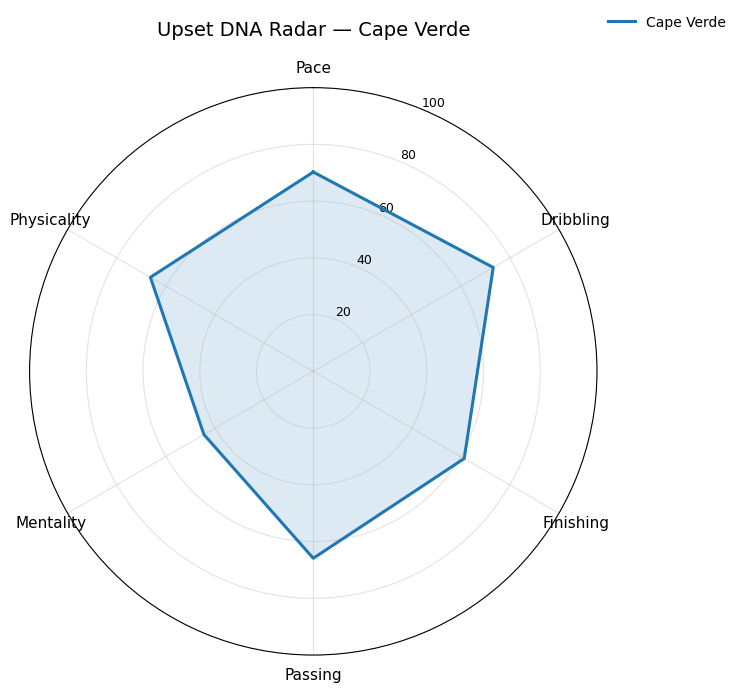


Most complete nations (non-null attributes):


nation  non_null  n_players  n_top_used       Pace  Dribbling  \
7   cape verde         6         20          14  70.257835  73.233049   
10     curacao         6         18          14  76.228438  71.856967   
17       haiti         6         16          14  62.525814  65.801672   
18        iran         6         16          14  62.525814  65.801672   
21      jordan         6         21          14  73.191509  69.584171   
30       qatar         6         26          14  61.777211  67.670301   
41  uzbekistan         6         23          14  66.449526  75.274321   
6       canada         5         26          14  78.492468  78.315934   

    Finishing    Passing  Mentality  Physicality  
7   61.435545  65.885638  44.523810    66.300366  
10  55.305675  60.291424  33.809524    63.186813  
17  48.277454  52.477616  31.904762    66.715871  
18  48.277454  52.477616  31.904762    66.715871  
21  62.982501  55.269390  44.297969    56.530949  
30  65.149897  66.271902  65.129219    70.533558  
41  73.268871  70.599772  62.561801    63.897822  
6   66.459362  67.629046  60.000000          NaN

In [11]:
# Create a hexagonal radar chart for Upset-DNA nation scores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_upset_dna_radar(nation_upset: pd.DataFrame, nations, attrs=None, title=None, fill_alpha=0.15):
    """Plot a radar chart for one or more nations using Upset-DNA attribute columns."""
    if attrs is None:
        attrs = ["Pace", "Dribbling", "Finishing", "Passing", "Mentality", "Physicality"]

    # Normalize nations input
    if isinstance(nations, str):
        nations = [nations]

    df_plot = nation_upset.set_index("nation")
    missing = [n for n in nations if n not in df_plot.index]
    if missing:
        raise ValueError(f"Nation(s) not found: {missing}. Available examples: {list(df_plot.index[:10])}")

    values = df_plot.loc[nations, attrs].copy()

    # Angle setup
    N = len(attrs)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7.5, 7.5), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attrs, fontsize=11)

    # Radial scale 0-100
    ax.set_ylim(0, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(["20", "40", "60", "80", "100"], fontsize=9)
    ax.grid(True, alpha=0.35)

    # Plot each nation
    cmap = plt.get_cmap("tab10")
    for i, n in enumerate(nations):
        row = values.loc[n]
        row_closed = row.tolist() + row.tolist()[:1]

        # If there are NaNs, matplotlib will break the polygon; interpolate across missing for display,
        # but also warn via title note.
        if np.isnan(row_closed).any():
            s = pd.Series(row_closed)
            row_closed = s.interpolate(limit_direction="both").tolist()

        color = cmap(i % 10)
        ax.plot(angles, row_closed, linewidth=2.2, label=n.title(), color=color)
        ax.fill(angles, row_closed, alpha=fill_alpha, color=color)

    if title is None:
        title = "Upset DNA (Nation-level)"
    ax.set_title(title, fontsize=14, pad=18)

    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15), frameon=False)
    plt.tight_layout()
    return fig, ax

# Choose a sensible default nation for display (first with at least 4 non-null attributes)
attrs = ["Pace", "Dribbling", "Finishing", "Passing", "Mentality", "Physicality"]
non_null_counts = nation_upset[attrs].notna().sum(axis=1)
default_nation = nation_upset.loc[non_null_counts.idxmax(), "nation"]

print("Default nation for radar (most complete attributes):", default_nation)

plot_upset_dna_radar(
    nation_upset=nation_upset,
    nations=default_nation,
    attrs=attrs,
    title=f"Upset DNA Radar — {default_nation.title()}"
)
plt.show()

# Also show top 8 most complete nations so the user can pick
most_complete = nation_upset.assign(non_null=non_null_counts).sort_values(["non_null", "nation"], ascending=[False, True])
print("\nMost complete nations (non-null attributes):")
display(most_complete[["nation", "non_null", "n_players", "n_top_used"] + attrs].head(8))


### DEMO_PLAYERS (10-player sample)

```ts
export const DEMO_PLAYERS = [
  {
    name: "R. Aït-Nouri",
    nation: "Algeria",
    position: "LWB",
    age: 24,
    overall: 81,
    potential: 85,
    value: "€34.5M",
    playstyles: ["First Touch", "Trickster"],
    stats: {
      acceleration: 85,
      sprint_speed: 84,
      dribbling: 87,
      finishing: 50,
      short_passing: 79,
      long_passing: 72,
      total_attacking: 323,
      total_skill: 373,
      total_movement: 407,
      total_power: 332,
      total_mentality: 339,
      total_defending: 235,
    },
  },
  {
    name: "R. Bensebaini",
    nation: "Algeria",
    position: "CB",
    age: 30,
    overall: 80,
    potential: 80,
    value: "€17.5M",
    playstyles: ["Bruiser"],
    stats: {
      acceleration: 72,
      sprint_speed: 73,
      dribbling: 78,
      finishing: 72,
      short_passing: 77,
      long_passing: 68,
      total_attacking: 363,
      total_skill: 357,
      total_movement: 355,
      total_power: 378,
      total_mentality: 371,
      total_defending: 244,
    },
  },
  {
    name: "L. Messi",
    nation: "Argentina",
    position: "RW",
    age: 37,
    overall: 90,
    potential: 90,
    value: "€18M",
    playstyles: ["Trickster", "First Touch", "Tiki Taka"],
    stats: {
      acceleration: 80,
      sprint_speed: 73,
      dribbling: 94,
      finishing: 91,
      short_passing: 90,
      long_passing: 85,
      total_attacking: 450,
      total_skill: 480,
      total_movement: 390,
      total_power: 300,
      total_mentality: 450,
      total_defending: 120,
    },
  },
  {
    name: "K. Mbappé",
    nation: "France",
    position: "ST",
    age: 26,
    overall: 91,
    potential: 93,
    value: "€180M",
    playstyles: ["Finesse Shot", "Power Header", "Speedster"],
    stats: {
      acceleration: 97,
      sprint_speed: 98,
      dribbling: 92,
      finishing: 93,
      short_passing: 80,
      long_passing: 72,
      total_attacking: 470,
      total_skill: 430,
      total_movement: 480,
      total_power: 390,
      total_mentality: 410,
      total_defending: 150,
    },
  },
  {
    name: "V. van Dijk",
    nation: "Netherlands",
    position: "CB",
    age: 33,
    overall: 87,
    potential: 87,
    value: "€28M",
    playstyles: ["Bruiser", "Aerial"],
    stats: {
      acceleration: 72,
      sprint_speed: 75,
      dribbling: 68,
      finishing: 60,
      short_passing: 78,
      long_passing: 80,
      total_attacking: 280,
      total_skill: 300,
      total_movement: 340,
      total_power: 420,
      total_mentality: 380,
      total_defending: 450,
    },
  },
  {
    name: "J. Bellingham",
    nation: "England",
    position: "CM",
    age: 21,
    overall: 88,
    potential: 93,
    value: "€180M",
    playstyles: ["Power Shot", "First Touch", "Long Ball Pass"],
    stats: {
      acceleration: 78,
      sprint_speed: 77,
      dribbling: 85,
      finishing: 79,
      short_passing: 84,
      long_passing: 80,
      total_attacking: 400,
      total_skill: 410,
      total_movement: 390,
      total_power: 400,
      total_mentality: 430,
      total_defending: 320,
    },
  },
  {
    name: "A. Hakimi",
    nation: "Morocco",
    position: "RB",
    age: 26,
    overall: 85,
    potential: 87,
    value: "€75M",
    playstyles: ["Speedster", "Trickster"],
    stats: {
      acceleration: 94,
      sprint_speed: 95,
      dribbling: 84,
      finishing: 65,
      short_passing: 78,
      long_passing: 72,
      total_attacking: 370,
      total_skill: 380,
      total_movement: 450,
      total_power: 350,
      total_mentality: 360,
      total_defending: 310,
    },
  },
  {
    name: "Son Heung-min",
    nation: "South Korea",
    position: "LW",
    age: 32,
    overall: 85,
    potential: 85,
    value: "€30M",
    playstyles: ["Finesse Shot", "Speedster"],
    stats: {
      acceleration: 90,
      sprint_speed: 88,
      dribbling: 87,
      finishing: 88,
      short_passing: 80,
      long_passing: 70,
      total_attacking: 430,
      total_skill: 400,
      total_movement: 440,
      total_power: 350,
      total_mentality: 390,
      total_defending: 180,
    },
  },
  {
    name: "G. Donnarumma",
    nation: "Italy",
    position: "GK",
    age: 26,
    overall: 88,
    potential: 90,
    value: "€70M",
    playstyles: ["Far Throw", "Footwork"],
    stats: {
      acceleration: 58,
      sprint_speed: 55,
      dribbling: 30,
      finishing: 15,
      short_passing: 55,
      long_passing: 60,
      total_attacking: 80,
      total_skill: 90,
      total_movement: 250,
      total_power: 380,
      total_mentality: 340,
      total_defending: 50,
      total_goalkeeping: 440,
    },
  },
  {
    name: "R. Yamal",
    nation: "Spain",
    position: "RW",
    age: 17,
    overall: 82,
    potential: 95,
    value: "€120M",
    playstyles: ["Trickster", "Finesse Shot", "First Touch"],
    stats: {
      acceleration: 91,
      sprint_speed: 88,
      dribbling: 90,
      finishing: 78,
      short_passing: 82,
      long_passing: 74,
      total_attacking: 400,
      total_skill: 430,
      total_movement: 450,
      total_power: 290,
      total_mentality: 370,
      total_defending: 140,
    },
  },
] as const;
```


In [16]:
# Build a DataFrame for the 10 DEMO_PLAYERS stats (from the markdown snippet) to support diamond plots
import pandas as pd

DEMO_PLAYERS = [
  {
    "name": "R. Aït-Nouri",
    "nation": "Algeria",
    "position": "LWB",
    "age": 24,
    "overall": 81,
    "potential": 85,
    "value": "€34.5M",
    "playstyles": ["First Touch", "Trickster"],
    "stats": {
      "acceleration": 85,
      "sprint_speed": 84,
      "dribbling": 87,
      "finishing": 50,
      "short_passing": 79,
      "long_passing": 72,
      "total_attacking": 323,
      "total_skill": 373,
      "total_movement": 407,
      "total_power": 332,
      "total_mentality": 339,
      "total_defending": 235,
    },
  },
  {
    "name": "R. Bensebaini",
    "nation": "Algeria",
    "position": "CB",
    "age": 30,
    "overall": 80,
    "potential": 80,
    "value": "€17.5M",
    "playstyles": ["Bruiser"],
    "stats": {
      "acceleration": 72,
      "sprint_speed": 73,
      "dribbling": 78,
      "finishing": 72,
      "short_passing": 77,
      "long_passing": 68,
      "total_attacking": 363,
      "total_skill": 357,
      "total_movement": 355,
      "total_power": 378,
      "total_mentality": 371,
      "total_defending": 244,
    },
  },
  {
    "name": "L. Messi",
    "nation": "Argentina",
    "position": "RW",
    "age": 37,
    "overall": 90,
    "potential": 90,
    "value": "€18M",
    "playstyles": ["Trickster", "First Touch", "Tiki Taka"],
    "stats": {
      "acceleration": 80,
      "sprint_speed": 73,
      "dribbling": 94,
      "finishing": 91,
      "short_passing": 90,
      "long_passing": 85,
      "total_attacking": 450,
      "total_skill": 480,
      "total_movement": 390,
      "total_power": 300,
      "total_mentality": 450,
      "total_defending": 120,
    },
  },
  {
    "name": "K. Mbappé",
    "nation": "France",
    "position": "ST",
    "age": 26,
    "overall": 91,
    "potential": 93,
    "value": "€180M",
    "playstyles": ["Finesse Shot", "Power Header", "Speedster"],
    "stats": {
      "acceleration": 97,
      "sprint_speed": 98,
      "dribbling": 92,
      "finishing": 93,
      "short_passing": 80,
      "long_passing": 72,
      "total_attacking": 470,
      "total_skill": 430,
      "total_movement": 480,
      "total_power": 390,
      "total_mentality": 410,
      "total_defending": 150,
    },
  },
  {
    "name": "V. van Dijk",
    "nation": "Netherlands",
    "position": "CB",
    "age": 33,
    "overall": 87,
    "potential": 87,
    "value": "€28M",
    "playstyles": ["Bruiser", "Aerial"],
    "stats": {
      "acceleration": 72,
      "sprint_speed": 75,
      "dribbling": 68,
      "finishing": 60,
      "short_passing": 78,
      "long_passing": 80,
      "total_attacking": 280,
      "total_skill": 300,
      "total_movement": 340,
      "total_power": 420,
      "total_mentality": 380,
      "total_defending": 450,
    },
  },
  {
    "name": "J. Bellingham",
    "nation": "England",
    "position": "CM",
    "age": 21,
    "overall": 88,
    "potential": 93,
    "value": "€180M",
    "playstyles": ["Power Shot", "First Touch", "Long Ball Pass"],
    "stats": {
      "acceleration": 78,
      "sprint_speed": 77,
      "dribbling": 85,
      "finishing": 79,
      "short_passing": 84,
      "long_passing": 80,
      "total_attacking": 400,
      "total_skill": 410,
      "total_movement": 390,
      "total_power": 400,
      "total_mentality": 430,
      "total_defending": 320,
    },
  },
  {
    "name": "A. Hakimi",
    "nation": "Morocco",
    "position": "RB",
    "age": 26,
    "overall": 85,
    "potential": 87,
    "value": "€75M",
    "playstyles": ["Speedster", "Trickster"],
    "stats": {
      "acceleration": 94,
      "sprint_speed": 95,
      "dribbling": 84,
      "finishing": 65,
      "short_passing": 78,
      "long_passing": 72,
      "total_attacking": 370,
      "total_skill": 380,
      "total_movement": 450,
      "total_power": 350,
      "total_mentality": 360,
      "total_defending": 310,
    },
  },
  {
    "name": "Son Heung-min",
    "nation": "South Korea",
    "position": "LW",
    "age": 32,
    "overall": 85,
    "potential": 85,
    "value": "€30M",
    "playstyles": ["Finesse Shot", "Speedster"],
    "stats": {
      "acceleration": 90,
      "sprint_speed": 88,
      "dribbling": 87,
      "finishing": 88,
      "short_passing": 80,
      "long_passing": 70,
      "total_attacking": 430,
      "total_skill": 400,
      "total_movement": 440,
      "total_power": 350,
      "total_mentality": 390,
      "total_defending": 180,
    },
  },
  {
    "name": "G. Donnarumma",
    "nation": "Italy",
    "position": "GK",
    "age": 26,
    "overall": 88,
    "potential": 90,
    "value": "€70M",
    "playstyles": ["Far Throw", "Footwork"],
    "stats": {
      "acceleration": 58,
      "sprint_speed": 55,
      "dribbling": 30,
      "finishing": 15,
      "short_passing": 55,
      "long_passing": 60,
      "total_attacking": 80,
      "total_skill": 90,
      "total_movement": 250,
      "total_power": 380,
      "total_mentality": 340,
      "total_defending": 50,
      "total_goalkeeping": 440,
    },
  },
  {
    "name": "R. Yamal",
    "nation": "Spain",
    "position": "RW",
    "age": 17,
    "overall": 82,
    "potential": 95,
    "value": "€120M",
    "playstyles": ["Trickster", "Finesse Shot", "First Touch"],
    "stats": {
      "acceleration": 91,
      "sprint_speed": 88,
      "dribbling": 90,
      "finishing": 78,
      "short_passing": 82,
      "long_passing": 74,
      "total_attacking": 400,
      "total_skill": 430,
      "total_movement": 450,
      "total_power": 290,
      "total_mentality": 370,
      "total_defending": 140,
    },
  },
]

# Flatten into a DataFrame
rows = []
for p in DEMO_PLAYERS:
    row = {k: p.get(k) for k in ["name", "nation", "position", "age", "overall", "potential", "value"]}
    row["playstyles"] = ", ".join(p.get("playstyles", []))
    for stat_k, stat_v in p.get("stats", {}).items():
        row[stat_k] = stat_v
    rows.append(row)

df_demo = pd.DataFrame(rows)
print("df_demo shape:", df_demo.shape)
display(df_demo.head(10))

# Define the 4 axes for the diamond (classic football 'diamond' = Pace/Shooting/Passing/Dribbling)
diamond_axes = [
    ("Pace", ["acceleration", "sprint_speed"]),
    ("Shooting", ["finishing"]),
    ("Passing", ["short_passing", "long_passing"]),
    ("Dribbling", ["dribbling"]),
]

# Compute axis values (0-100) as mean of available components
for axis_name, comps in diamond_axes:
    present = [c for c in comps if c in df_demo.columns]
    df_demo[axis_name] = df_demo[present].mean(axis=1)

# Keep a compact table for plotting
df_diamond = df_demo[["name", "nation", "position", "overall"] + [a for a, _ in diamond_axes]].copy()
display(df_diamond)


df_demo shape: (10, 21)


name       nation position  age  overall  potential   value  \
0   R. Aït-Nouri      Algeria      LWB   24       81         85  €34.5M   
1  R. Bensebaini      Algeria       CB   30       80         80  €17.5M   
2       L. Messi    Argentina       RW   37       90         90    €18M   
3      K. Mbappé       France       ST   26       91         93   €180M   
4    V. van Dijk  Netherlands       CB   33       87         87    €28M   
5  J. Bellingham      England       CM   21       88         93   €180M   
6      A. Hakimi      Morocco       RB   26       85         87    €75M   
7  Son Heung-min  South Korea       LW   32       85         85    €30M   
8  G. Donnarumma        Italy       GK   26       88         90    €70M   
9       R. Yamal        Spain       RW   17       82         95   €120M   

                                playstyles  acceleration  sprint_speed  ...  \
0                   First Touch, Trickster            85            84  ...   
1                                  Bruiser            72            73  ...   
2        Trickster, First Touch, Tiki Taka            80            73  ...   
3    Finesse Shot, Power Header, Speedster            97            98  ...   
4                          Bruiser, Aerial            72            75  ...   
5  Power Shot, First Touch, Long Ball Pass            78            77  ...   
6                     Speedster, Trickster            94            95  ...   
7                  Finesse Shot, Speedster            90            88  ...   
8                      Far Throw, Footwork            58            55  ...   
9     Trickster, Finesse Shot, First Touch            91            88  ...   

   finishing  short_passing  long_passing  total_attacking  total_skill  \
0         50             79            72              323          373   
1         72             77            68              363          357   
2         91             90            85              450          480   
3         93             80            72              470          430   
4         60             78            80              280          300   
5         79             84            80              400          410   
6         65             78            72              370          380   
7         88             80            70              430          400   
8         15             55            60               80           90   
9         78             82            74              400          430   

   total_movement  total_power  total_mentality  total_defending  \
0             407          332              339              235   
1             355          378              371              244   
2             390          300              450              120   
3             480          390              410              150   
4             340          420              380              450   
5             390          400              430              320   
6             450          350              360              310   
7             440          350              390              180   
8             250          380              340               50   
9             450          290              370              140   

   total_goalkeeping  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8              440.0  
9                NaN  

[10 rows x 21 columns]

name       nation position  overall  Pace  Shooting  Passing  \
0   R. Aït-Nouri      Algeria      LWB       81  84.5      50.0     75.5   
1  R. Bensebaini      Algeria       CB       80  72.5      72.0     72.5   
2       L. Messi    Argentina       RW       90  76.5      91.0     87.5   
3      K. Mbappé       France       ST       91  97.5      93.0     76.0   
4    V. van Dijk  Netherlands       CB       87  73.5      60.0     79.0   
5  J. Bellingham      England       CM       88  77.5      79.0     82.0   
6      A. Hakimi      Morocco       RB       85  94.5      65.0     75.0   
7  Son Heung-min  South Korea       LW       85  89.0      88.0     75.0   
8  G. Donnarumma        Italy       GK       88  56.5      15.0     57.5   
9       R. Yamal        Spain       RW       82  89.5      78.0     78.0   

   Dribbling  
0       87.0  
1       78.0  
2       94.0  
3       92.0  
4       68.0  
5       85.0  
6       84.0  
7       87.0  
8       30.0  
9       90.0

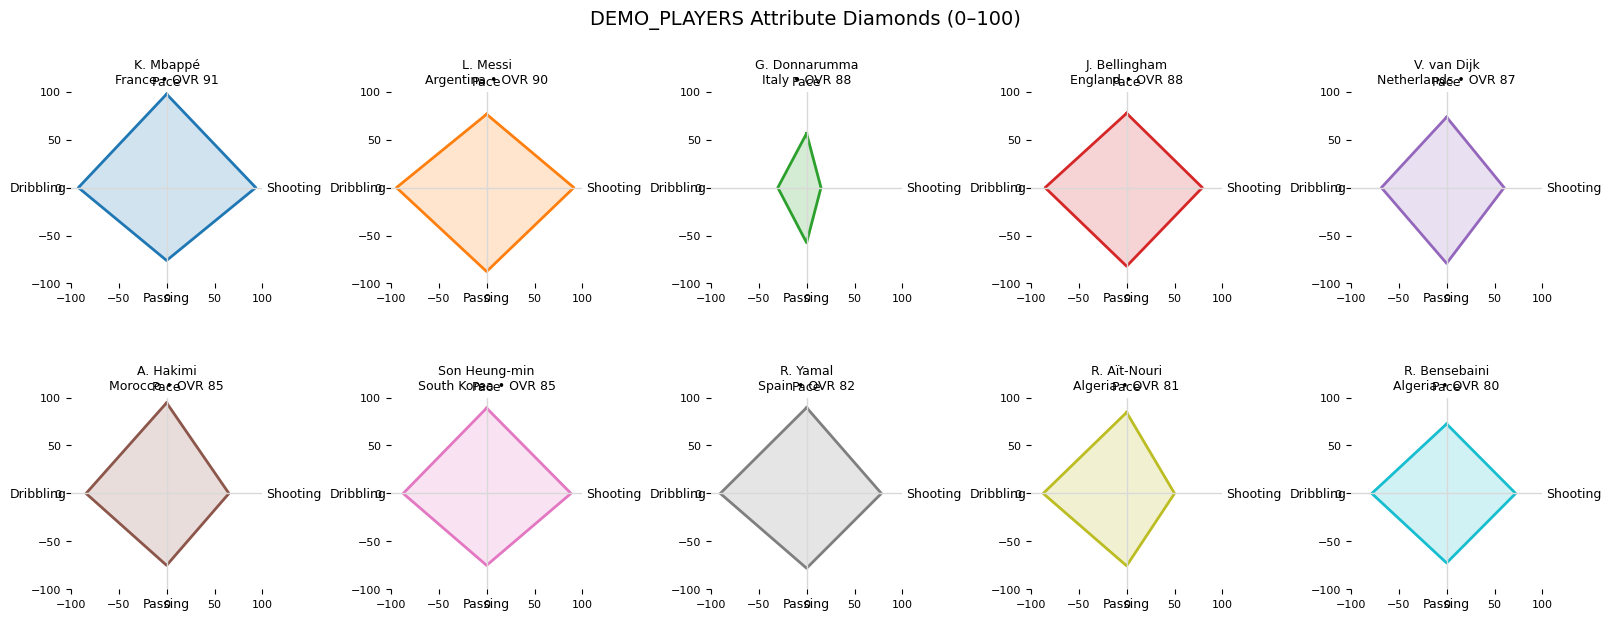

In [17]:
# Plot diamond charts (Pace/Shooting/Passing/Dribbling) for the 10 demo players as small multiples
import numpy as np
import matplotlib.pyplot as plt

def plot_diamond(ax, values, labels=("Pace","Shooting","Passing","Dribbling"), color="C0", alpha=0.20, lw=2):
    """Draw a diamond (rotated square) on a regular x/y axis.
    Order is top, right, bottom, left: Pace, Shooting, Passing, Dribbling.
    Values assumed in [0, 100]."""
    pace, shooting, passing, dribbling = values
    pts = np.array([
        [0, pace],          # top
        [shooting, 0],      # right
        [0, -passing],      # bottom
        [-dribbling, 0],    # left
        [0, pace],
    ], dtype=float)

    ax.plot(pts[:,0], pts[:,1], color=color, lw=lw)
    ax.fill(pts[:,0], pts[:,1], color=color, alpha=alpha)

    # Axis lines
    ax.axhline(0, color="0.85", lw=1)
    ax.axvline(0, color="0.85", lw=1)

    # Limits and ticks (symmetric)
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_aspect('equal', adjustable='box')

    # Minimal ticks for readability
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-100, -50, 0, 50, 100])
    ax.tick_params(labelsize=8)

    # Label the four axes
    ax.text(0, 104, labels[0], ha='center', va='bottom', fontsize=9)
    ax.text(104, 0, labels[1], ha='left', va='center', fontsize=9)
    ax.text(0, -108, labels[2], ha='center', va='top', fontsize=9)
    ax.text(-104, 0, labels[3], ha='right', va='center', fontsize=9)

    # Clean spines
    for spine in ax.spines.values():
        spine.set_visible(False)

# Ensure we have the expected columns
required = ["Pace","Shooting","Passing","Dribbling"]
missing = [c for c in required if c not in df_diamond.columns]
if missing:
    raise ValueError(f"df_diamond is missing required columns: {missing}")

plot_order = df_diamond.sort_values(["overall","name"], ascending=[False, True]).reset_index(drop=True)

n = len(plot_order)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*3.2, rows*3.2), constrained_layout=True)
axes = np.array(axes).reshape(-1)

cmap = plt.get_cmap("tab10")

for i, (_, r) in enumerate(plot_order.iterrows()):
    ax = axes[i]
    color = cmap(i % 10)
    vals = [float(r["Pace"]), float(r["Shooting"]), float(r["Passing"]), float(r["Dribbling"])]
    plot_diamond(ax, vals, color=color)
    ax.set_title(f"{r['name']}\n{r['nation']} • OVR {r['overall']}", fontsize=9)

# Turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("DEMO_PLAYERS Attribute Diamonds (0–100)", fontsize=14)
plt.show()


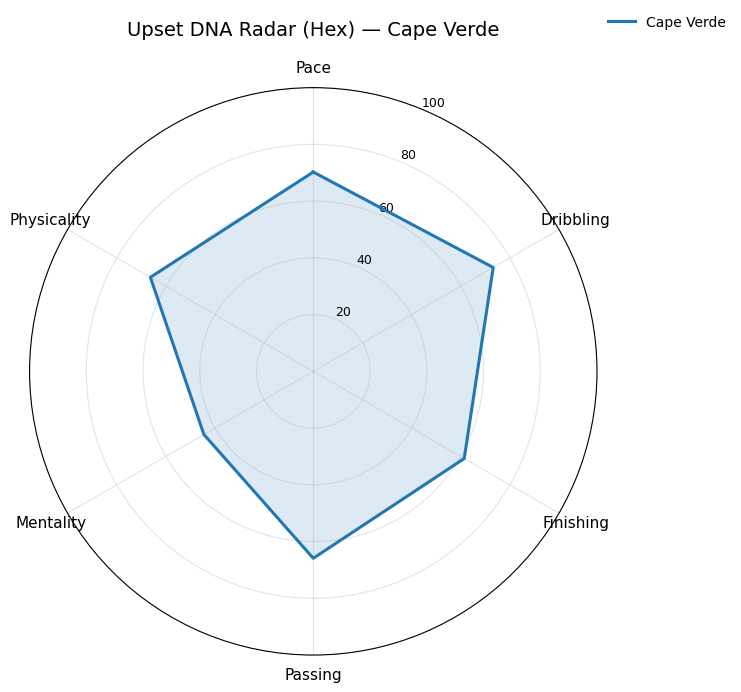

Plotted nations: ['cape verde']
If you want a different nation, pick from these examples:
['algeria', 'argentina', 'australia', 'austria', 'belgium', 'brazil', 'canada', 'cape verde', 'colombia', 'croatia', 'curacao', 'ecuador', 'egypt', 'england', 'france', 'germany', 'ghana', 'haiti', 'iran', 'ivory coast', 'japan', 'jordan', 'mexico', 'morocco', 'netherlands', 'new zealand', 'norway', 'panama', 'paraguay', 'portugal'] ...


In [18]:
# Plot the Upset-DNA hex radar (nation-level). Update `nations_to_plot` to compare multiple nations.
import matplotlib.pyplot as plt

# Choose one or more nations (must match `nation_upset['nation']` values, which are lowercase)
# Examples from most_complete: ['cape verde', 'curacao', 'haiti', 'iran', 'jordan', 'qatar', 'uzbekistan', 'canada']
nations_to_plot = [default_nation]  # e.g., ['cape verde'] or ['qatar','uzbekistan','canada']

fig, ax = plot_upset_dna_radar(
    nation_upset=nation_upset,
    nations=nations_to_plot,
    attrs=["Pace", "Dribbling", "Finishing", "Passing", "Mentality", "Physicality"],
    title="Upset DNA Radar (Hex) — " + ", ".join([n.title() for n in nations_to_plot]),
)
plt.show()

print("Plotted nations:", nations_to_plot)
print("If you want a different nation, pick from these examples:")
print(sorted(nation_upset['nation'].unique())[:30], "...")


In [21]:
# Build a DataFrame for the NEW 10 DEMO_PLAYERS list and compute Upset-DNA (6 attributes) scaled 0–100 within this 10-player set
import numpy as np
import pandas as pd

DEMO_PLAYERS_2 = [
  {
    "name": "K. Mbappé",
    "nation": "France",
    "position": "ST",
    "age": 26,
    "overall": 91,
    "potential": 92,
    "value": "€157M",
    "playstyles": ["Acrobatic", "Low Driven Shot", "Gamechanger"],
    "stats": {
      "acceleration": 97,
      "sprint_speed": 97,
      "dribbling": 92,
      "finishing": 94,
      "short_passing": 87,
      "long_passing": 74,
      "total_attacking": 424,
      "total_skill": 408,
      "total_movement": 460,
      "total_power": 427,
      "total_mentality": 357,
      "total_defending": 92,
    },
  },
  {
    "name": "E. Haaland",
    "nation": "Norway",
    "position": "ST",
    "age": 24,
    "overall": 91,
    "potential": 93,
    "value": "€172.5M",
    "playstyles": ["Power Shot", "Precision Header", "Acrobatic"],
    "stats": {
      "acceleration": 82,
      "sprint_speed": 92,
      "dribbling": 79,
      "finishing": 96,
      "short_passing": 78,
      "long_passing": 66,
      "total_attacking": 407,
      "total_skill": 367,
      "total_movement": 408,
      "total_power": 441,
      "total_mentality": 391,
      "total_defending": 118,
    },
  },
  {
    "name": "Lamine Yamal",
    "nation": "Spain",
    "position": "CAM",
    "age": 17,
    "overall": 89,
    "potential": 95,
    "value": "€147M",
    "playstyles": ["Gamechanger", "Incisive Pass", "Inventive"],
    "stats": {
      "acceleration": 88,
      "sprint_speed": 84,
      "dribbling": 92,
      "finishing": 83,
      "short_passing": 88,
      "long_passing": 84,
      "total_attacking": 363,
      "total_skill": 424,
      "total_movement": 437,
      "total_power": 366,
      "total_mentality": 314,
      "total_defending": 78,
    },
  },
  {
    "name": "J. Musiala",
    "nation": "Germany",
    "position": "CAM",
    "age": 22,
    "overall": 88,
    "potential": 92,
    "value": "€133.5M",
    "playstyles": ["Low Driven Shot", "Gamechanger", "Incisive Pass"],
    "stats": {
      "acceleration": 85,
      "sprint_speed": 75,
      "dribbling": 94,
      "finishing": 86,
      "short_passing": 87,
      "long_passing": 79,
      "total_attacking": 393,
      "total_skill": 392,
      "total_movement": 436,
      "total_power": 376,
      "total_mentality": 357,
      "total_defending": 191,
    },
  },
  {
    "name": "A. Hakimi",
    "nation": "Morocco",
    "position": "RB",
    "age": 26,
    "overall": 89,
    "potential": 90,
    "value": "€111M",
    "playstyles": ["Whipped Pass", "Jockey", "Anticipate"],
    "stats": {
      "acceleration": 89,
      "sprint_speed": 95,
      "dribbling": 82,
      "finishing": 80,
      "short_passing": 86,
      "long_passing": 73,
      "total_attacking": 396,
      "total_skill": 398,
      "total_movement": 433,
      "total_power": 410,
      "total_mentality": 392,
      "total_defending": 246,
    },
  },
  {
    "name": "V. van Dijk",
    "nation": "Netherlands",
    "position": "CB",
    "age": 33,
    "overall": 89,
    "potential": 89,
    "value": "€49.5M",
    "playstyles": ["Pinged Pass", "Jockey", "Intercept"],
    "stats": {
      "acceleration": 66,
      "sprint_speed": 78,
      "dribbling": 70,
      "finishing": 52,
      "short_passing": 80,
      "long_passing": 83,
      "total_attacking": 318,
      "total_skill": 360,
      "total_movement": 338,
      "total_power": 402,
      "total_mentality": 354,
      "total_defending": 268,
    },
  },
  {
    "name": "F. Valverde",
    "nation": "Uruguay",
    "position": "CM",
    "age": 26,
    "overall": 88,
    "potential": 89,
    "value": "€107M",
    "playstyles": ["Intercept", "Slide Tackle", "Aerial Fortress"],
    "stats": {
      "acceleration": 84,
      "sprint_speed": 92,
      "dribbling": 83,
      "finishing": 80,
      "short_passing": 88,
      "long_passing": 88,
      "total_attacking": 386,
      "total_skill": 407,
      "total_movement": 410,
      "total_power": 442,
      "total_mentality": 396,
      "total_defending": 253,
    },
  },
  {
    "name": "M. Caicedo",
    "nation": "Ecuador",
    "position": "CDM",
    "age": 23,
    "overall": 88,
    "potential": 90,
    "value": "€107M",
    "playstyles": ["Tiki Taka", "Intercept", "Anticipate"],
    "stats": {
      "acceleration": 76,
      "sprint_speed": 66,
      "dribbling": 79,
      "finishing": 59,
      "short_passing": 86,
      "long_passing": 84,
      "total_attacking": 340,
      "total_skill": 376,
      "total_movement": 388,
      "total_power": 406,
      "total_mentality": 377,
      "total_defending": 259,
    },
  },
  {
    "name": "M. Ødegaard",
    "nation": "Norway",
    "position": "CM",
    "age": 26,
    "overall": 86,
    "potential": 87,
    "value": "€79.5M",
    "playstyles": ["Inventive", "Technical", "First Touch"],
    "stats": {
      "acceleration": 68,
      "sprint_speed": 68,
      "dribbling": 87,
      "finishing": 79,
      "short_passing": 90,
      "long_passing": 88,
      "total_attacking": 389,
      "total_skill": 429,
      "total_movement": 392,
      "total_power": 364,
      "total_mentality": 369,
      "total_defending": 197,
    },
  },
  {
    "name": "David Raya",
    "nation": "Spain",
    "position": "GK",
    "age": 29,
    "overall": 87,
    "potential": 87,
    "value": "€54.5M",
    "playstyles": ["One Club Player"],
    "stats": {
      "acceleration": 64,
      "sprint_speed": 59,
      "dribbling": 19,
      "finishing": 19,
      "short_passing": 62,
      "long_passing": 67,
      "total_attacking": 133,
      "total_skill": 162,
      "total_movement": 320,
      "total_power": 212,
      "total_mentality": 149,
      "total_defending": 55,
      "total_goalkeeping": 429,
    },
  },
]

# Flatten into DataFrame
rows = []
for p in DEMO_PLAYERS_2:
    row = {k: p.get(k) for k in ["name", "nation", "position", "age", "overall", "potential", "value"]}
    row["playstyles"] = ", ".join(p.get("playstyles", []))
    for stat_k, stat_v in p.get("stats", {}).items():
        row[stat_k] = stat_v
    rows.append(row)

df10_new = pd.DataFrame(rows)

# Define Upset-DNA attributes using available columns in this 10-player set
attr_defs_demo = {
    "Pace": ["acceleration", "sprint_speed"],
    "Dribbling": ["dribbling"],
    "Finishing": ["finishing"],
    "Passing": ["short_passing", "long_passing"],
    "Mentality": ["total_mentality"],
    "Physicality": ["total_power"],
}

# Scale each base stat to 0-100 within this 10-player set
base_cols = sorted({c for cols in attr_defs_demo.values() for c in cols if c in df10_new.columns})
scaled10_new = pd.DataFrame(index=df10_new.index)
for c in base_cols:
    s = pd.to_numeric(df10_new[c], errors="coerce")
    lo, hi = s.min(), s.max()
    if pd.isna(lo) or pd.isna(hi) or hi <= lo:
        scaled10_new[c] = np.nan
    else:
        scaled10_new[c] = (s - lo) / (hi - lo) * 100.0

# Composite attributes
player_hex10_new = df10_new[["name", "nation", "position", "overall"]].copy()
for attr, cols in attr_defs_demo.items():
    cols = [c for c in cols if c in scaled10_new.columns]
    player_hex10_new[attr] = scaled10_new[cols].mean(axis=1, skipna=True)

print("Computed hexagon attributes for new 10-player set:")
display(player_hex10_new.sort_values(["overall", "name"], ascending=[False, True]).reset_index(drop=True))


Computed hexagon attributes for new 10-player set:


name       nation position  overall        Pace   Dribbling  \
0    E. Haaland       Norway       ST       91   70.693780   80.000000   
1     K. Mbappé       France       ST       91  100.000000   97.333333   
2     A. Hakimi      Morocco       RB       89   85.247209   84.000000   
3  Lamine Yamal        Spain      CAM       89   69.258373   97.333333   
4   V. van Dijk  Netherlands       CB       89   28.030303   68.000000   
5   F. Valverde      Uruguay       CM       88   73.724083   85.333333   
6    J. Musiala      Germany      CAM       88   52.870813  100.000000   
7    M. Caicedo      Ecuador      CDM       88   27.392344   80.000000   
8    David Raya        Spain       GK       87    0.000000    0.000000   
9   M. Ødegaard       Norway       CM       86   17.902711   90.666667   

    Finishing     Passing   Mentality  Physicality  
0  100.000000   28.571429   97.975709    99.565217  
1   97.402597   62.824675   84.210526    93.478261  
2   79.220779   58.766234   98.380567    86.086957  
3   83.116883   87.337662   66.801619    66.956522  
4   42.857143   70.779221   82.995951    82.608696  
5   79.220779   96.428571  100.000000   100.000000  
6   87.012987   74.188312   84.210526    71.304348  
7   51.948052   83.766234   92.307692    84.347826  
8    0.000000    2.272727    0.000000     0.000000  
9   77.922078  100.000000   89.068826    66.086957